## Import necessary python packages /functions

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import math


# Scenerio Without lockdown 

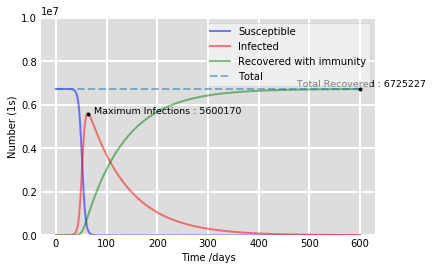

5600170.138287829

In [2]:
#--------------------------------------------------------------------------------------------------------
# INITIAL VALUES 
#--------------------------------------------------------------------------------------------------------
# Total population, N.
N = 6732219
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.315055143, 0.012541575
#------------------------------------------------------------------------------------------------
# here beeta = average(beeta for each day  before locked down) 
#   and gamma = average( gamma for each day before locked down)
#  formulas are listed in report... 
#  Calculation are shown in file 'Initial beeta , gamma'
#-------------------------------------------------------------------------------------------------

# A grid of time points (in days)
t = np.linspace(0, 600,600)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t,S+I+R,alpha=0.5, lw=2, label='Total',ls='--')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1s)')
ax.set_ylim(0, 10000000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
# Ploting maximum number of Infections and Recovered #
style = dict(size=8, color='black', ha='left', va='top')

imax = max(I)
i = I.tolist()
indexI = i.index(imax)
ImaxSTR = str(np.int(imax))

rmax = max(R)
r = R.tolist()
indexR = r.index(rmax)
RmaxSTR = str(np.int(rmax))

ax.text(indexI,
        imax,
        "  Maximum Infections : " + ImaxSTR,
        size=9.5,
        color='black',
        ha='left')
ax.plot(indexI, imax, color='black', marker='o', markersize=3)

ax.text(indexR,
        rmax,
        " Total Recovered : " + RmaxSTR,
        size=9.5,
        color='black',
        ha='center',
        va='bottom')
ax.plot(indexR, rmax, color='black', marker='o', markersize=3)

plt.show()

#  ASSIGNING DIFFERENT SYMBOLS TO S,I,R as I will use these data again.
#  symbols for Susceptible, Infected and Recovered during Modeling on actual data.
s=S     #Susceptible
r=R     #Iecovered
Inf=I   #infected
max(I)

##### In Indiana USA very first case appear on 6 march 2020 ( which will be day 1 according to plots shown below) 
##### In Indiana first complete lockdown implemented  on 23 march .

# After Lockdown 

In indiana USA no of recovered people was not available day by day until 1 june. But actual number of Susceptible and death data was available. So I use the Susceptible People data and Fit it to curve S(t) which is written in report and then Use its result to 
predict R(t)  such that It matches the actual recovered people data that I have after 1 June . 
This ensure that  I am doing my modeling so precisely as I have data to crosscheck.(!!!!!!!)
Finally I find the No. of Infected I(t)  by using the expression I(t)= N-S(t)-R(t)

## Functions Used

### Constants c0,c1,c2,c3,c4  and d0,d1,d2,d3 are defined in report 

In [3]:
import numpy as np
def recovered(t,d):  #function for R(t)
    d0=(0.0031113694210964755)/d 
    d1=(0.003649549452589146)/d
    d2=2.09301098e-02
    d3=1.55054122e+00
    return (d0+d1*np.tanh(d2*t-d3))

In [4]:
def susceptible(t,c0,c1,c2,c3,c4): # function for curve-fit susceptible people
    S0=6732219                     # No of susceptible on day 1
    return S0*(1-c4*(c0+c1*np.tanh(c2*t-c3)) + (c4*(c0+c1*np.tanh(c2*t-c3)))**2)
                

In [5]:
def susceptibled(t,d0,d1,d2,d3,d):
    S0=6732219
    return S0*(1-d*(d0+d1*np.tanh(d2*t-d3)) + (d*(d0+d1*np.tanh(d2*t-d3)))**2)

### Reading Files

In [6]:
df_s1=pd.read_excel('Indiana_USA_Covid_Data.xlsx',sheet_name=0)
df_s2=pd.read_excel('Indiana_USA_Covid_Data.xlsx',sheet_name=1)
df_s1.shape,df_s2.shape

((107, 9), (600, 1))

In [7]:
print('Columns of sheet 2')
print('\n',df_s2.columns.tolist())
print('\nColumns of sheet 1')
df_s1.columns.tolist()


Columns of sheet 2

 ['Index']

Columns of sheet 1


['Index',
 'DATE',
 'DAILY_BASE_CASES',
 'DAILY_BASE_DEATHS',
 'COVID_COUNT_CUMSUM',
 'COVID_DEATHS_CUMSUM',
 'RECOVERED_COUNT_CUMSUM',
 'DAILY_BASIS_RECOVERED',
 'SUSCEPTIBLE']

In [8]:
N=6732219 #ACTUAL POPULATION  

## Curve Fitting the Susceptible Population Using scipy.optimize  curve_fit() function

Predicted Value of parameters:
(c0 c1 c2 c3 c4)= [1.74077750e-04 2.04188340e-04 2.57102046e-02 1.56217274e+00
 1.78734469e+01] 

Covariance/Error Matrix:'
' [[ 3.63914536e-02  4.26862538e-02 -1.03178274e-05 -9.07387760e-04
  -3.73877784e+03]
 [ 4.26862538e-02  5.00698952e-02 -1.21039640e-05 -1.06443170e-03
  -4.38549177e+03]
 [-1.03178273e-05 -1.21039639e-05  4.08006466e-07  2.23541889e-05
   1.05998871e+00]
 [-9.07387758e-04 -1.06443170e-03  2.23541889e-05  1.31889544e-03
   9.32219603e+01]
 [-3.73877784e+03 -4.38549177e+03  1.05998872e+00  9.32219605e+01
   3.84113807e+08]] 

Standard Deviation are the square roots of main diagonal value of covariance matrix.

Standard Deviations: 0.1907654412748959 0.22376303350216747 0.000638753838039405 0.036316600123158224


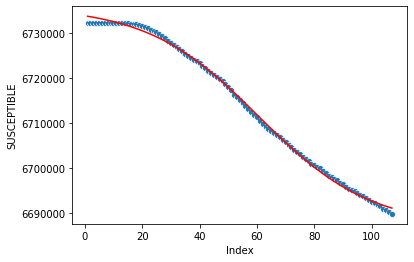

In [9]:
#plotting actual data

sns.scatterplot(x='Index',y='SUSCEPTIBLE',data=df_s1)
sns.lineplot(x='Index',y='SUSCEPTIBLE',data=df_s1)

#fitting the curve

g=[0.00000001,0,1,1,1]   #guess value

t=df_s1['Index'].values                    #A grid of time points (in days) after 6 march 2020
act_S=df_s1['SUSCEPTIBLE'].values             #actual susceptible after 6 march
c,cov=curve_fit(susceptible,t,act_S,g)
print('Predicted Value of parameters:\n(c0 c1 c2 c3 c4)=',c,'\n')

#plotting curve fitting

n=len(df_s1['Index'])
l=np.empty(n)
for i in range(n):
    l[i]=susceptible(df_s1['Index'][i],c[0],c[1],c[2],c[3],c[4])
plt.plot(df_s1['Index'],l,'r')


print("Covariance/Error Matrix:'\n'",cov,'\n')
print('Standard Deviation are the square roots of main diagonal value of covariance matrix.\n')
print('Standard Deviations:',np.sqrt(cov[0,0]),np.sqrt(cov[1,1]),np.sqrt(cov[2,2]),np.sqrt(cov[3,3]))

In [10]:
c0, c1, c2, c3, c4= [1.74077750e-04, 2.04188340e-04 ,2.57102046e-02 ,1.56217274e+00, 1.78734469e+01] 
c0*c4,c1*c4

(0.0031113694210964755, 0.003649549452589146)

Minimum Susceptible : 6686699
Day after which no more change in Susceptible Population  Observed: i.e.when  S=min(S) is 326
Finally Change in susceptible : N-Min(S)= 45519


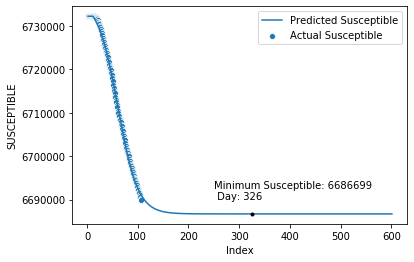

In [22]:
sns.scatterplot(x='Index',y='SUSCEPTIBLE',data=df_s1,label='Actual Susceptible') 
c=[1.70944748e-04 ,2.01119282e-04 ,2.54281098e-02, 1.55054122e+00, 1.82971753e+01]
S=[0]*len(df_s2['Index'])
for i in range(len(S)):
    S[i]=susceptible(df_s2['Index'][i],c[0],c[1],c[2],c[3],c[4])

for i in range(len(S)):
    if S[i]>6732219:
        S[i]=6732219
sns.lineplot(df_s2['Index'],S,label='Predicted Susceptible')
for i in range(len(S)):
    if int(S[i])==int(min(S)):
        plt.annotate('Minimum Susceptible: {}\n Day: {} '.format(int(S[i]),i),(i,S[i]),xytext=(250,6690000))
        plt.plot(i, S[i], color='black', marker='o', markersize=3)
        break

print('Minimum Susceptible :',int(min(S)))
for i in range(len(S)):
    if int(S[i])==int(min(S)) :
        print('Day after which no more change in Susceptible Population  Observed: i.e.when  S=min(S) is',i)
        k=i
        break
print('Finally Change in susceptible : N-Min(S)=',int(N-min(S))) 

## Predicting  Recovered  People from susceptible people S(t):


Predicted Value of parameter:d= [1.47822077e-07] 

Covariance/Error Matrix: [[2.72533651e-18]]
Standard Deviation: [1.65085932e-09]


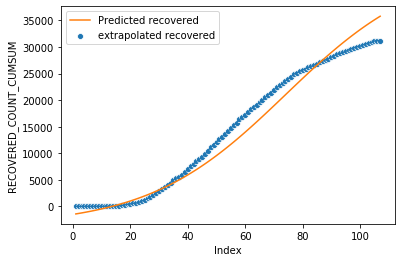

In [12]:
#plotting actual data

sns.scatterplot(x='Index',y='RECOVERED_COUNT_CUMSUM',data=df_s1,label='extrapolated recovered')
sns.lineplot(x='Index',y='RECOVERED_COUNT_CUMSUM',data=df_s1)

#fitting the curve

g=[1.0e-04] #guess value

t=df_s1['Index'].values                    #Days after 6 march
act_r=df_s1['RECOVERED_COUNT_CUMSUM'].values  #extrapolated recovered after 6 march till 1 june then actual more details in report
d,cov=curve_fit(recovered,t,act_r,g)
print('Predicted Value of parameter:d=',d,'\n')

#plotting curve fitting

n=len(df_s1['Index'])
l=np.empty(n)
for i in range(n):
    l[i]=recovered(df_s1['Index'][i],d[0])

sns.lineplot(df_s1['Index'],l,label='Predicted recovered')
print("Covariance/Error Matrix:",cov)
# Note : standard deviation are the square root of main diagonal value of covariance matrix 'cov'
print('Standard Deviation:',np.sqrt(cov[0]))

Maximum recovered : 45206
Day at which maximum recovered people observed: 349


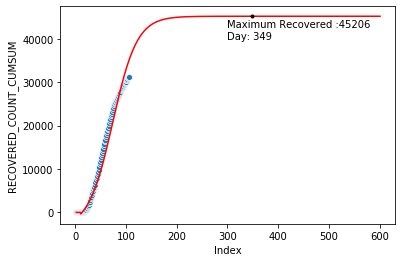

In [13]:
# RECOVERED PEOPLE
#--------------------------------------------------------------------------------------------------------------------------
sns.scatterplot(x='Index',y='RECOVERED_COUNT_CUMSUM',data=df_s1)
#sns.lineplot(x='Index',y='INFECTED',data=df_s1)
d=[1.49556450e-07]  # This is what we get predicted from curve_fitting
R=[0]*len(df_s2['Index'])
for i in range(9, len(R)): #I am starting from i=9 since in actual data till then R=0
    R[i]=recovered(df_s2['Index'][i],d[0])
plt.plot(df_s2['Index'],R,'r')

print('Maximum recovered :',int(max(R)))
for i in range(len(R)):
    if int(R[i])==int(max(R)):
        print('Day at which maximum recovered people observed:',i)
        k=i
        break
plt.annotate('Maximum Recovered :{} \nDay: {}'.format(int(R[k]),k),(k,R[k]),xytext=(300,40000))
plt.savefig('max_recovered')

Rmax=int(R[k])
I_Rmax=k
# Ploting maximum number of Infections and Recovered #
style = dict(size=8, color='black', ha='left', va='top')

plt.plot(i, int(max(R)), color='black', marker='o', markersize=3)

## Conclusion : Pandemic will end after 349 days starting from 6 march 2020.

## Infected People

Maximum Infectives on day 77 are 8221


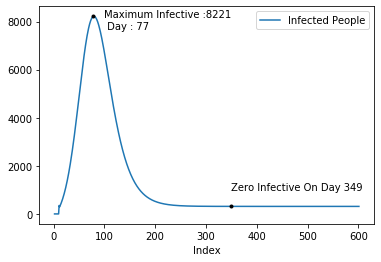

In [14]:
In=[0]*len(df_s2['Index'])
for i in range(len(In)):
    In[i]=N-S[i]-R[i]     
sns.lineplot(df_s2['Index'],In,label='Infected People')

for i in range(len(In)):
    if (In[i]==max(In)):
        j=i
        break
for i in range(len(In)):
    if (In[i]<0.01 and i > j): #very near to zero less than 1 % error
        print('Pandemic ends after {} days '.format(i))
        k=i
        break
print('Maximum Infectives on day {} are {}'.format(j,int(In[j])))
plt.annotate('Maximum Infective :{} \n Day : {}'.format(int(In[j]),j),(j,In[j]),xytext=(100,7700))
plt.plot(j, int(In[j]), color='black', marker='o', markersize=3)
plt.annotate('Zero Infective On Day {} '.format(k),(k,In[k]),xytext=(k,1000))
plt.plot(k, int(In[k]), color='black', marker='o', markersize=3)
plt.savefig('Min_infected.png')
Imax=int(In[j])
I_max=j
I_min=k

### Final dataset of S,I,R

In [15]:
#S
#I
#R
#len(S),len(I),len(R)

## Comparision before and after lockdown

### - Infected people

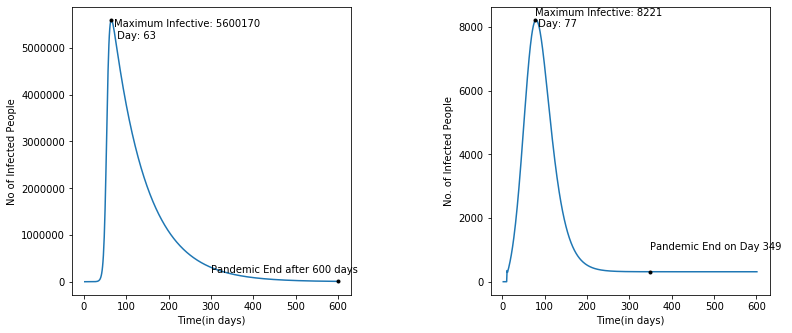

In [16]:

T=[0]*len(df_s2['Index'])
for i in range(len(S)):
    T[i]=S[i]+R[i]+In[i]
#Total population,T
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
sns.lineplot(df_s2['Index'],Inf).set(xlabel='Time(in days)',ylabel='No of Infected People')
plt.annotate('Maximum Infective: {}\n Day: {} '.format(int(Inf[indexI]),indexI),(indexI,Inf[indexI]),xytext=(70,5200000))
plt.plot(indexI, int(Inf[indexI]), color='black', marker='o', markersize=3)
plt.annotate('Pandemic End after 600 days',(599,Inf[599]),xytext=(299,200000))
plt.plot(599,Inf[599],color='black',marker='o',markersize=3)

plt.subplot(132)
sns.lineplot(df_s2['Index'],In).set(xlabel='Time(in days)',ylabel='No. of Infected People')
plt.annotate('Pandemic End on Day {} '.format(I_min),(I_min,In[I_min]),xytext=(I_min,1000))
plt.plot(I_min, int(In[I_min]), color='black', marker='o', markersize=3)
plt.annotate('Maximum Infective: {}\n Day: {} '.format(int(In[I_max]),I_max),(I_max,int(In[I_max])),xytext=(I_max,8000))
plt.plot(I_max, int(In[I_max]), color='black', marker='o', markersize=3)
        
plt.savefig('Infected_people.png')       

### - Recovered people

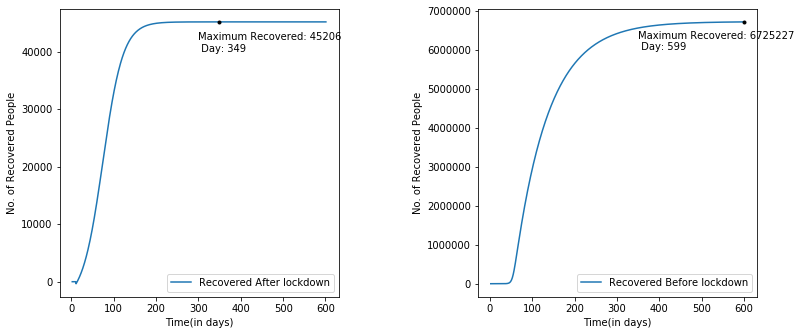

In [17]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
sns.lineplot(df_s2['Index'],R,label='Recovered After lockdown').set(xlabel='Time(in days)',ylabel='No. of Recovered People')
for i in range(len(R)):
    if int(R[i])==int(max(R)):
        plt.annotate('Maximum Recovered: {}\n Day: {} '.format(int(R[i]),i),(i,R[i]),xytext=(300,40000))
        plt.plot(i, R[i], color='black', marker='o', markersize=3)
        break

plt.subplot(132)
sns.lineplot(df_s2['Index'],r,label='Recovered Before lockdown').set(xlabel='Time(in days)',ylabel='No. of Recovered People')
for i in range(len(r)):
    if int(r[i])==int(max(r)):
        plt.annotate('Maximum Recovered: {}\n Day: {} '.format(int(r[i]),i),(i,r[i]),xytext=(350,6000000))
        plt.plot(i, r[i], color='black', marker='o', markersize=3)
        break

plt.savefig("Recovered_People.png")

### - Susceptible People

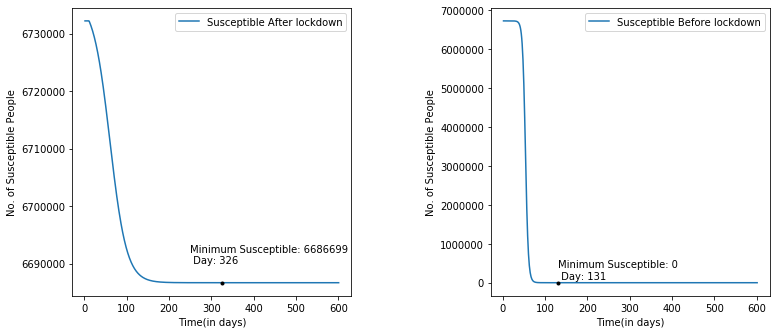

In [18]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.5,hspace=0.2)

plt.subplot(131)
sns.lineplot(df_s2['Index'],S,label='Susceptible After lockdown').set(xlabel='Time(in days)',ylabel='No. of Susceptible People')
for i in range(len(S)):
    if int(S[i])==int(min(S)):
        plt.annotate('Minimum Susceptible: {}\n Day: {} '.format(int(S[i]),i),(i,S[i]),xytext=(250,6690000))
        plt.plot(i, S[i], color='black', marker='o', markersize=3)
        break
    
plt.subplot(132)

sns.lineplot(df_s2['Index'],s,label='Susceptible Before lockdown').set(xlabel='Time(in days)',ylabel='No. of Susceptible People')
for i in range(len(s)):
    if int(s[i])==int(min(s)):
        plt.annotate('Minimum Susceptible: {}\n Day: {} '.format(int(s[i]),i),(i,s[i]),xytext=(i,100000))
        plt.plot(i, s[i], color='black', marker='o', markersize=3)
        break
plt.savefig("Susceptible.png")


In [19]:
d=1.48679146e-07
d0=(0.003127806020770324)/d
d1=(0.0036799147589641344)/d
d2=2.14281098e-02
d3=1.55054122e+00
gamma=32.835
d0,d1,gamma,d1/gamma,d2,d3

(21037.288045563055,
 24750.71224154149,
 32.835,
 753.7905357557937,
 0.0214281098,
 1.55054122)

In [21]:
rho=6723559.74575
I0=0
S0=6732218
I0+(S0-rho)+rho*np.log(rho/S0)

5.570045771119112